In [11]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D

WHITE_MAX = 255

In [12]:
def Get_my_immage(image_path):
	image = Image.open(image_path)

	gary_image = image.convert("L")

	pixel_array = np.array(gary_image)

	pixel_array = WHITE_MAX - pixel_array
	pixel_array = pixel_array / WHITE_MAX

	pixel_array_expand = np.expand_dims(pixel_array, axis = 0)

	return pixel_array_expand, pixel_array


def Predict_number_by_path(model, image_path):
	pixel_array_expand, pixel_array = Get_my_immage(image_path)

	res = model.predict(pixel_array_expand)
	print("My full vector: ", res)
	print("My gauess it is: ", np.argmax(res))

	plt.imshow(pixel_array, cmap = plt.cm.binary)
	plt.show()

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalized
x_train = x_train / WHITE_MAX
x_test = x_test / WHITE_MAX

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)

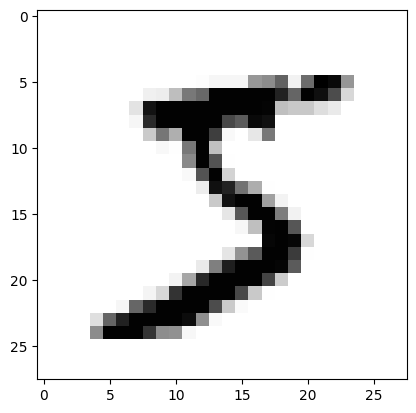

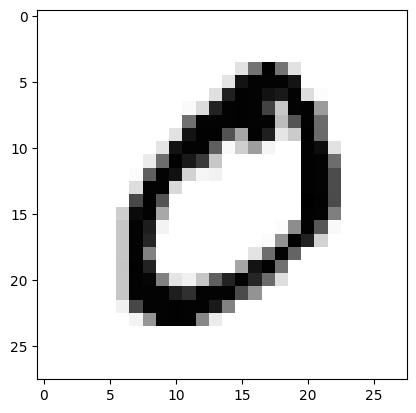

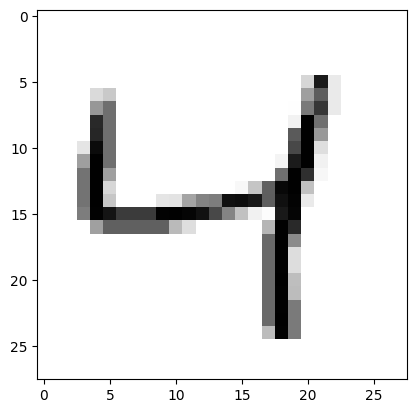

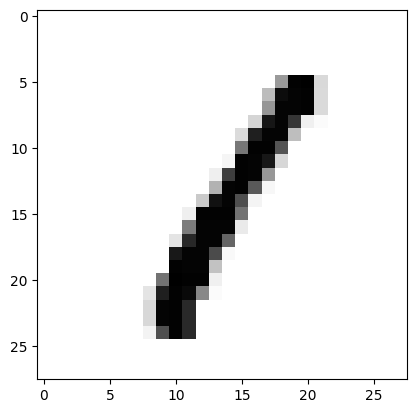

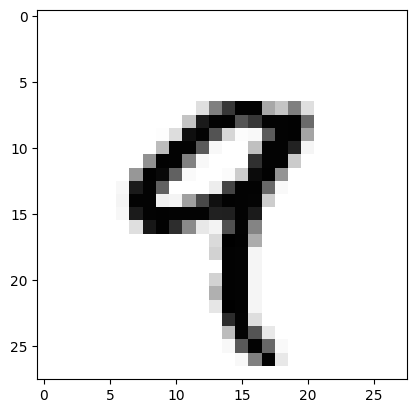

In [14]:
for i in range(5):
    plt.imshow(x_train[i], cmap = 'Greys')
    plt.show()

In [15]:
model = keras.Sequential([
    Conv2D(32, (3, 3), padding = 'same', activation = 'elu', input_shape = (28, 28, 1)),
    BatchNormalization(),
    Dropout(0.5),
    MaxPooling2D((2, 2), strides = 2),
    Conv2D(64, (3, 3), padding = 'same', activation = 'elu'),
    BatchNormalization(),
    Dropout(0.5),
    MaxPooling2D((2, 2), strides = 2),
    Flatten(),
    Dense(128, activation = 'elu'),
    Dense(10, activation = 'softmax')])

print(model.summary())

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

his = model.fit(x_train, y_train_cat, batch_size = 128, epochs = 5, validation_split = 0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_3 (Bat  (None, 14, 14, 64)       

2024-03-28 09:41:17.188781: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/5
375/375 [==============================] - 88s 220ms/step - loss: 0.3447 - accuracy: 0.9170 - val_loss: 1.4413 - val_accuracy: 0.6363
Epoch 2/5
375/375 [==============================] - 81s 217ms/step - loss: 0.0857 - accuracy: 0.9732 - val_loss: 0.2445 - val_accuracy: 0.9229
Epoch 3/5
375/375 [==============================] - 89s 236ms/step - loss: 0.0660 - accuracy: 0.9797 - val_loss: 0.2689 - val_accuracy: 0.9207
Epoch 4/5
375/375 [==============================] - 91s 242ms/step - loss: 0.0506 - accuracy: 0.9835 - val_loss: 0.1855 - val_accuracy: 0.9449
Epoch 5/5
375/375 [==============================] - 94s 251ms/step - loss: 0.0458 - accuracy: 0.9849 - val_loss: 0.1591 - val_accuracy: 0.9549


1/1 [==============================] - 0s 263ms/step
My full vector:  [[5.1680075e-07 3.1088674e-04 4.5103906e-03 9.9340183e-01 1.6427865e-07
  3.6086718e-04 2.7251360e-07 1.0171899e-03 6.6156776e-05 3.3179804e-04]]
My gauess it is:  3


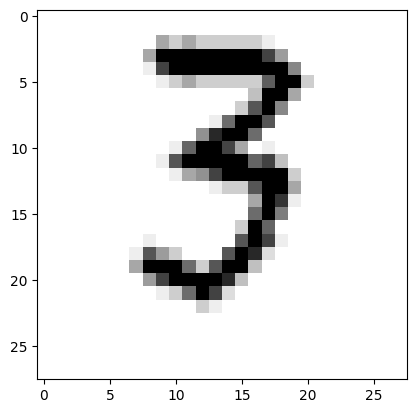

1/1 [==============================] - 0s 49ms/step
My full vector:  [[3.6068236e-06 7.3020709e-01 2.0353796e-02 3.7475850e-02 2.2457451e-04
  3.0078631e-04 2.5155579e-05 2.1119843e-01 1.9757205e-04 1.3128023e-05]]
My gauess it is:  1


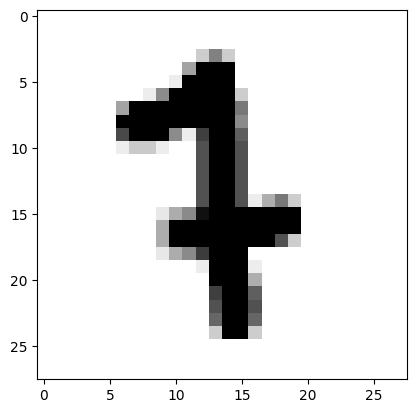

In [16]:
Predict_number_by_path(model, "test.png")
Predict_number_by_path(model, "Nazar_test_2.png")

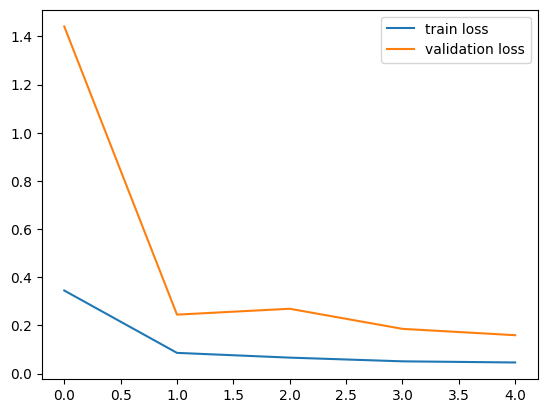

In [20]:
plt.plot(his.history['loss'], label = 'train loss')
plt.plot(his.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()


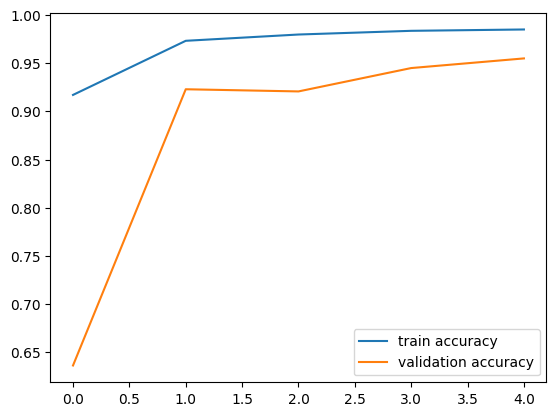

In [21]:
plt.plot(his.history['accuracy'], label = 'train accuracy')
plt.plot(his.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()